In [2]:
import pandas as pd
import numpy as np
from funciones import *
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)   # mostrar todas las columnas del df
pd.set_option('display.max_rows', None)   # mostrar todas las filas del df

## CARGA DE INFORMACiÓN

In [ ]:
'''
la inforamción que se ha descargado de la web del portal de datos de Madrid corresponde a dos tipos de datos diferentes.

Por un lado tenemos la situación de las estaciones por hora

Y por otro lado los trayectos realizados (salida entrada de bici)

La nformación viene dividida en archivos por cada mes 
se creo una función que lee cada tipo de archivo json y lo trasnforma en un dataframe
y otra función que recorre un directorio para cargar y juntar cada archivo en un solo dataset

'''

In [4]:
# tabla con información de las estaciones

estaciones = pd.read_csv(fr'../data_raw/bases/bases_bicimad.csv', sep=';' )



In [5]:
# dataset con la informacion de la situacion por horas de cada estacion

dir = r'C:\Users\aaron\AAROON\IRONHACK_BOOTCAMP_DATA\8_PROYECTO_FINAL\biciMAD_analysis\data_raw\conjunto_estaticos'

estatic =  agrupa_data(dir, conjunto_estaticos)

In [6]:
# dataset con la informacion de la situacion por horas de los trayectos

dir = r'C:\Users\aaron\AAROON\IRONHACK_BOOTCAMP_DATA\8_PROYECTO_FINAL\biciMAD_analysis\data_raw\conjunto_itinerarios'

itiner =  agrupa_data(dir, conjunto_itinerarios)

## EXPLORACIÓN INFO

In [8]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Número            269 non-null    object 
 1   Gis_X             269 non-null    object 
 2   Gis_Y             269 non-null    object 
 3   Fecha de Alta     269 non-null    int64  
 4   Distrito          269 non-null    object 
 5   Barrio            269 non-null    object 
 6   Calle             269 non-null    object 
 7   Nº Finca          269 non-null    object 
 8   Tipo de Reserva   269 non-null    object 
 9   Número de Plazas  269 non-null    int64  
 10  Longitud          269 non-null    float64
 11  Latitud           269 non-null    float64
 12  Direccion         269 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 27.4+ KB


In [10]:
itiner.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code
0,5ee862cecc8c1e839b419387,509e6a72b7673f533912bf647d20df19305b848fbc1b89...,5,1,20,154,44,5,40,2019-07-01T00:00:00Z,28007
1,5ee862cecc8c1e839b41938c,90069a1194c3eb9e6faecaaf4eefb7209e890c0df5aeac...,8,1,17,184,57,4,129,2019-07-01T00:00:00Z,28045
2,5ee862cecc8c1e839b419394,b0ecaab6a35b7ea44d118f851f7fad5c2237e7dd51b337...,15,1,16,282,53,4,43,2019-07-01T00:00:00Z,
3,5ee862cecc8c1e839b41939e,5e1b8a8c4603ee8ac4f06aba12ff51e2c5dd105b6e5193...,18,1,18,388,56,0,13,2019-07-01T00:00:00Z,
4,5ee862cecc8c1e839b4193a5,80974c4043db61721399c43f296ce1db4436c7f107f8fc...,1,1,20,254,105,0,75,2019-07-01T00:00:00Z,


In [11]:
itiner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7159891 entries, 0 to 413369
Data columns (total 11 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   _id               object
 1   user_day_code     object
 2   idplug_base       int64 
 3   user_type         int64 
 4   idunplug_base     int64 
 5   travel_time       int64 
 6   idunplug_station  int64 
 7   ageRange          int64 
 8   idplug_station    int64 
 9   unplug_hourTime   object
 10  zip_code          object
dtypes: int64(7), object(4)
memory usage: 655.5+ MB


In [12]:
estatic.head()

,_id,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,id
0,2019-07-01T00:29:26.018083,1,Puerta del Sol A,0,2,24,15,1a,-3.7024255,0,Puerta del Sol nº 1,40.4168961,8,1
1,2019-07-01T00:29:26.018083,1,Puerta del Sol B,0,2,24,14,1b,-3.7024207,0,Puerta del Sol nº 1,40.4170009,9,2
2,2019-07-01T00:29:26.018083,1,Miguel Moya,0,2,24,12,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,10,3
3,2019-07-01T00:29:26.018083,1,Plaza Conde Suchil,0,1,18,4,3,-3.7069171,0,Plaza del Conde Suchil nº 2-4,40.4302937,11,4
4,2019-07-01T00:29:26.018083,1,Malasaña,0,0,24,17,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,3,5


In [13]:
estatic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3923271 entries, 0 to 187967
Data columns (total 14 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   _id                 object
 1   activate            int64 
 2   name                object
 3   reservations_count  int64 
 4   light               int64 
 5   total_bases         int64 
 6   free_bases          int64 
 7   number              object
 8   longitude           object
 9   no_available        int64 
 10  address             object
 11  latitude            object
 12  dock_bikes          int64 
 13  id                  int64 
dtypes: int64(8), object(6)
memory usage: 449.0+ MB


In [14]:
estatic.isnull().values.any()

False

In [15]:
itiner.isnull().values.any()

False

In [ ]:
'''
En un primer vistazo comprobamos que no hay nulos y vemos que en la tabla static hay cosas como texto que deberían ser números
como la Longitud y latitud

'''

como primer objetivo vamos a construir una tabla que alamcene la información de las estaciones

In [7]:
estaciones.head()

,Número,Gis_X,Gis_Y,Fecha de Alta,Distrito,Barrio,Calle,Nº Finca,Tipo de Reserva,Número de Plazas,Longitud,Latitud,Direccion
0,001 a,"440443,61","4474290,65",43803,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,-3.701998,40.417111,"ALCALA, CALLE, DE, 2"
1,001 b,"440480,56","4474301,74",43867,01 CENTRO,01-06 SOL,"ALCALA, CALLE, DE",6,BiciMAD,30,-3.701564,40.417213,"ALCALA, CALLE, DE, 6"
2,2,"440134,83","4474678,23",41813,01 CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,-3.705674,40.420580,"MIGUEL MOYA, CALLE, DE, 1"
3,3,"440012,98","4475760,68",41813,07 CHAMBERÍ,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.707212,40.430322,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL, 2"
4,4,"440396,4","4475565,36",41813,01 CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASAÑA, CALLE, DE",3,BiciMAD,24,-3.702674,40.428590,"MANUELA MALASAÑA, CALLE, DE, 3"


In [25]:
estaciones['Número']= estaciones['Número'].str.replace('001', '1')
estaciones['Número']= estaciones['Número'].str.replace('025', '25')
estaciones['Número']= estaciones['Número'].str.replace('080', '80')

estaciones['Número']= estaciones['Número'].str.replace(' ', '')


In [26]:
e = estatic[['id', 'number']].groupby(['id', 'number']).count().reset_index()
e.head()

,id,number
0,1,1a
1,2,1b
2,3,2
3,4,3
4,5,4


In [27]:
e.set_index('number').join(estaciones[['Número', 'Direccion']].set_index('Número'), how = 'outer').head()

,id,Direccion
020ampliacion,NaN,"ALCALA, CALLE, DE, 49"
090ampliacion,NaN,"GOYA, CALLE, DE, 20"
10,11.0,"MARQUES DE LA ENSENADA, CALLE, DEL, 16"
100,105.0,"GOYA, CALLE, DE, 99"
101,106.0,"JORGE JUAN, CALLE, DE, 131"


In [ ]:
'''
la tabla estaciones no nos sirve como tabla. 
Porque no tiene los id que se utilizan en las tablas itner y estatic, además flatan algunas estaciones 

'''

se va a generar una tabla estaciones a partir de los datos de la tabla esttatic

In [21]:
estaciones1 = estatic[['id','number', 'name', 'longitude', 'latitude', 'address', 'total_bases']].groupby(['id','number', 'name', 'longitude', 'latitude', 'address', 'total_bases']).count().reset_index()
estaciones1.head()

,id,number,name,longitude,latitude,address,total_bases
0,1,1a,Madrid Sol 1A,-3.7024255,40.4168961,Puerta del Sol nº 1,24
1,1,1a,Puerta del Sol A,-3.70178074,40.41715281,Puerta del Sol nº 1,30
2,1,1a,Puerta del Sol A,-3.7018341,40.4172137,Puerta del Sol nº 1,30
3,1,1a,Puerta del Sol A,-3.7024255,40.4168961,Puerta del Sol nº 1,24
4,1,1a,Puerta del Sol A,-3.7024255,40.4168961,Puerta del Sol nº 1,30


In [ ]:
'''
no todas las estaciones contiene la información del mismo modo varía la coordenada el texto del nombre... además hay coordenadas
que están mal.

con cuidado y revisando cada cambio, quitando información incorrecta, y finalmente agrupando la inforamción obtenemos la tabla 
de estaciones
'''

In [23]:
estaciones1.drop(estaciones1[estaciones1['latitude'] == '---'].index, inplace = True)

In [28]:
# quita filas por indice

estaciones1.drop([0,1,5, 6, 13, 20, 59, 60, 233], inplace = True)

In [29]:
estaciones1 = estaciones1.groupby(['id','number']).agg({'name': 'max', 'longitude': 'max', 'latitude': 'max', 'address': 'max', 'total_bases': 'max'}).reset_index()

In [30]:
estaciones1.head()

,id,number,name,longitude,latitude,address,total_bases
0,1,1a,Puerta del Sol A,-3.7024255,40.4172137,Puerta del Sol nº 1,30
1,2,1b,Puerta del Sol B,-3.7024207,40.4170009,Puerta del Sol nº 1,30
2,3,2,Miguel Moya,-3.7058415,40.4205886,Calle Miguel Moya nº 1,24
3,4,3,Plaza Conde Suchil,-3.7069171,40.4302937,Plaza del Conde del Valle de Súchil nº 3,18
4,5,4,Malasaña,-3.7025875,40.4285524,Calle Manuela Malasaña nº 5,24


In [31]:
len(estaciones1)

266

In [ ]:
'''
ya tenemos todas las estaciones en un dataFrame, como tiene coordendas vamos a darle una componente geográfica
'''

In [33]:
estaciones = gpd.GeoDataFrame(
    estaciones1, geometry=gpd.points_from_xy(estaciones1.longitude, estaciones1.latitude), crs = 'EPSG:4326')


In [36]:
estaciones.to_file(r'..\data\geo_data\estaciones.geojson', driver="GeoJSON") 

In [41]:
itiner.to_csv(r'..\data\geo_data\itiner.csv', index=False)  

In [ ]:
estatic.to_csv(r'..\data\geo_data\estatic.csv', index=False)  

In [ ]:
estatic.latitude.unique()

In [ ]:
itiner['idunplug_station'].unique()

In [ ]:
estaciones.plot()

In [ ]:
z = estaciones[['id','total_bases']].groupby(['id','total_bases']).count().reset_index().groupby('id').count()

z[z['total_bases'] > 1]

In [ ]:
len(estatic['number'].unique())

In [ ]:
estaciones

In [ ]:
i = itiner[['idunplug_station', 'idplug_station']].groupby(['idunplug_station', 'idplug_station']).count().reset_index()

In [ ]:
e.set_index('id').join(i.set_index('idunplug_station'), how = 'outer')

In [ ]:
x = e.set_index('id').join(i.set_index('idunplug_station'), how = 'outer').isna()
x[x.number == True]

In [ ]:
estacionex = gpd.read_file(r'..\data\geo_data\estaciones.geojson')

In [38]:
barrios = gpd.read_file(r'..\data\geo_data\Barrios\Barrios.shp')

In [39]:
barrios = barrios.to_crs(4326)

In [ ]:
barrios.head()

In [ ]:
barrios.info()

In [ ]:
barrios[~barrios['CODDIS'].isin(['8','18','17'])]

In [ ]:
barrios.plot()

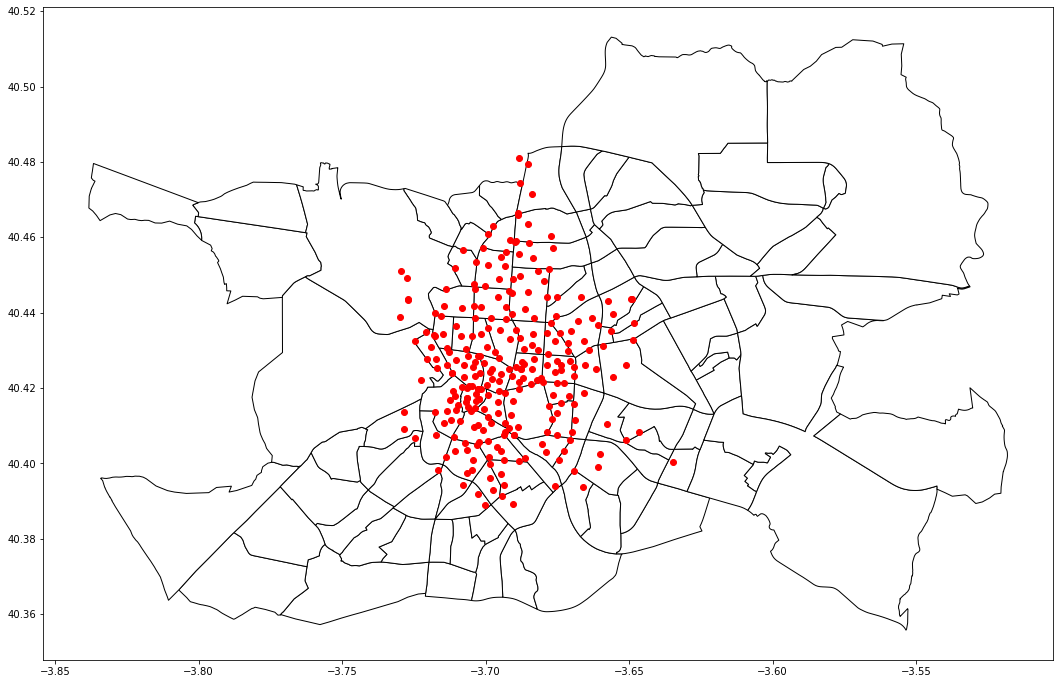

In [40]:
ax = barrios[~barrios['CODDIS'].isin(['8','18','17'])].plot(
    color='white', edgecolor='black', figsize = (20,12))

estacionex.plot(ax=ax, color='red')

plt.show()